<a href="https://colab.research.google.com/github/pkwbim/ai-learning/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from tensorflow.keras.datasets.mnist import load_data
load_data()
(x_train, y_train), (x_test, y_test) = load_data()


In [218]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


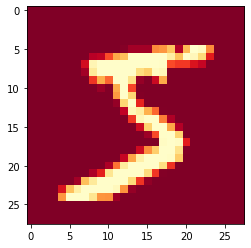

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[0], cmap='YlOrRd_r')

In [220]:
import pandas as pd
pd.DataFrame(x_train[idx])



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

layers = [
  Dense(128, activation='relu', input_dim=784),
  Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [222]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [223]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [224]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255


In [225]:
# batch_size: 看幾筆再做一次梯度下降
# validation_split: 切出一部份資料來驗證模型好壞
# epoch: 整份資料要看幾
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = early_stopping_callback = EarlyStopping(patience = 5, restore_best_weights=True)

model.fit(x_train_norm, y_train_cat, batch_size = 200, validation_split=0.1, epochs=50, verbose=1, callbacks = [stop_callback, save_callback])



Epoch 1/50
270/270 [==============================] - 2s 6ms/step - loss: 0.4233 - accuracy: 0.8859 - val_loss: 0.1933 - val_accuracy: 0.9450
Epoch 2/50
270/270 [==============================] - 1s 5ms/step - loss: 0.2037 - accuracy: 0.9424 - val_loss: 0.1480 - val_accuracy: 0.9588
Epoch 3/50
270/270 [==============================] - 1s 4ms/step - loss: 0.1533 - accuracy: 0.9565 - val_loss: 0.1206 - val_accuracy: 0.9657
Epoch 4/50
270/270 [==============================] - 1s 5ms/step - loss: 0.1219 - accuracy: 0.9650 - val_loss: 0.1040 - val_accuracy: 0.9695
Epoch 5/50
270/270 [==============================] - 1s 5ms/step - loss: 0.1009 - accuracy: 0.9709 - val_loss: 0.0972 - val_accuracy: 0.9718
Epoch 6/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0853 - accuracy: 0.9757 - val_loss: 0.0908 - val_accuracy: 0.9737
Epoch 7/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0723 - accuracy: 0.9797 - val_loss: 0.0864 - val_accuracy: 0.9757
Epoch 

In [226]:
model.evaluate(x_test_norm, y_test_cat)


313/313 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9777


[0.07163464277982712, 0.9776999950408936]

In [227]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_class(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)


In [228]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre), index=["{}(真實值)".format(i) for i in range(10)], columns=["{}(預測值)".format(i) for i in range(10)])


,0(預測值),1(預測值),2(預測值),3(預測值),4(預測值),5(預測值),6(預測值),7(預測值),8(預測值),9(預測值)
0(真實值),967,1,1,1,1,2,3,2,1,1
1(真實值),0,1122,4,2,0,1,2,2,2,0
2(真實值),2,1,1011,2,0,1,2,7,5,1
3(真實值),0,0,3,991,0,4,0,6,4,2
4(真實值),0,0,5,0,953,0,5,4,3,12
5(真實值),3,1,0,11,1,871,2,0,3,0
6(真實值),6,2,3,1,5,4,934,0,3,0
7(真實值),1,3,8,3,0,0,0,1008,0,5
8(真實值),3,0,5,6,2,4,1,3,949,1
9(真實值),2,4,0,9,6,7,1,7,2,971


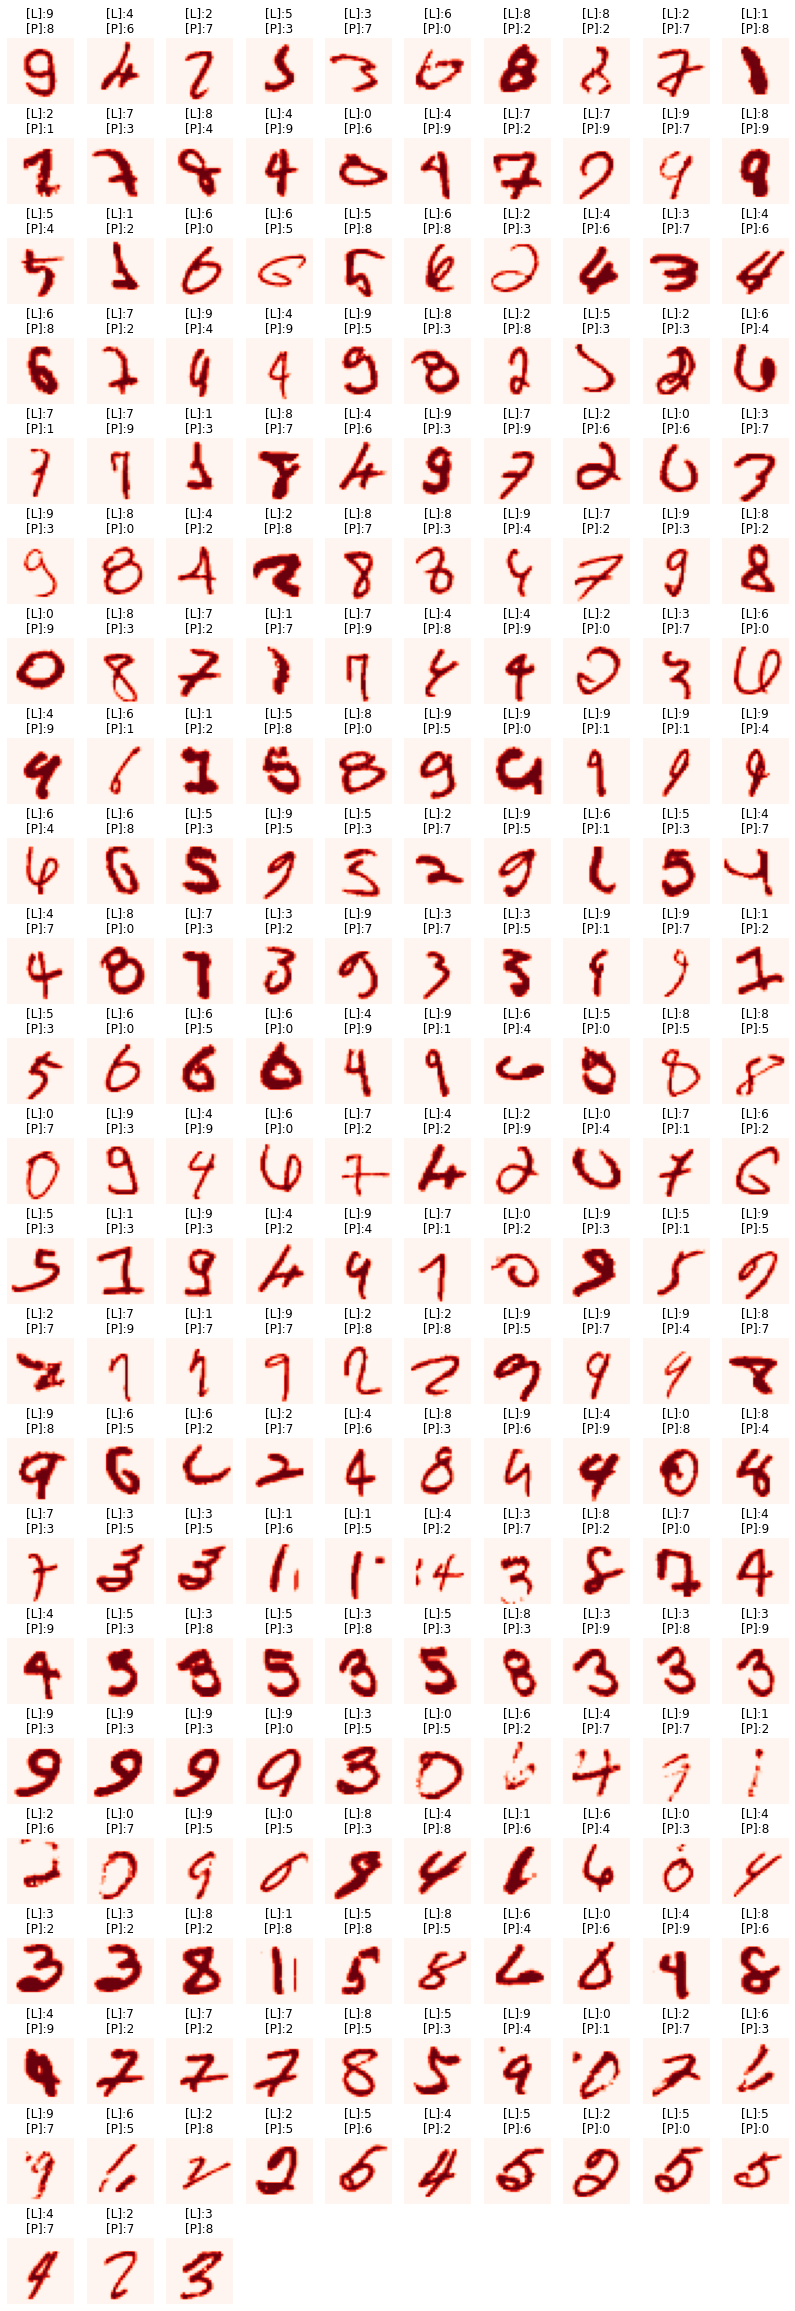

In [229]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d in enumerate(idx): 
  img, label, p = x_test[d], y_test[d], pre[d]
  t = "[L]:{}\n[P]:{}".format(label,p)
  plt.subplot(height , width, i+1)
  plt.title(t)
  plt.axis('off')
  plt.imshow(img, cmap='Reds')



檔名：6_2.png
0 的機率 1.0364988e-09
1 的機率 2.8864489e-11
2 的機率 3.7651904e-12
3 的機率 3.926087e-09
4 的機率 5.186251e-17
5 的機率 0.18499175
6 的機率 0.8150069
7 的機率 1.2068077e-13
8 的機率 1.2532317e-06
9 的機率 8.1549134e-14


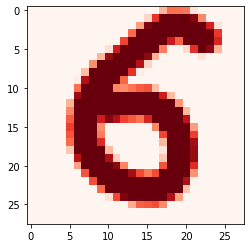

In [231]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名：")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) /255
pre = model.predict(img_np)[0]
for i in range(10):
  print(i, "的機率", pre[i])
plt.imshow(np.array(img), cmap="Reds")
